In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('survey_results_public.csv')
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
data.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [4]:
data = data[['Country', 'EdLevel', 'Age', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
data = data.rename({'ConvertedCompYearly':'Salary'}, axis=1)
data.head()

,Country,EdLevel,Age,YearsCodePro,Employment,Salary
0,NaN,NaN,18-24 years old,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",45-54 years old,23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,4,"Employed, full-time;Independent contractor, fr...",23456.0


In [5]:
data['Salary'].isnull().value_counts()

Salary
False    48019
True     41165
Name: count, dtype: int64

In [6]:
data = data[data['Salary'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   Age           48019 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Employment    48007 non-null  object 
 5   Salary        48019 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


In [7]:
data.dropna(inplace=True)
data.isnull().value_counts()

Country  EdLevel  Age    YearsCodePro  Employment  Salary
False    False    False  False         False       False     47813
Name: count, dtype: int64

In [8]:
data['Employment'].value_counts()

Employment
Employed, full-time                                                                             39155
Independent contractor, freelancer, or self-employed                                             3880
Employed, full-time;Independent contractor, freelancer, or self-employed                         3282
Employed, part-time                                                                               899
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Retired                                                                                            33
I prefer not to say                                                                                33
Independent contractor, freelancer, or self-employed;Retired           

In [9]:
data = data[data['Employment'] == 'Employed, full-time']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   Age           39155 non-null  object 
 3   YearsCodePro  39155 non-null  object 
 4   Employment    39155 non-null  object 
 5   Salary        39155 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [11]:
data['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [12]:
def shorten_categories(category, cutoff):
    categorical_map = {}
    for i in range(len(category)):
        if category.values[i] >= cutoff:
            categorical_map[category.index[i]] = category.index[i]
        else:
            categorical_map[category.index[i]] = 'Other'
    return categorical_map

In [13]:
countries = shorten_categories(data['Country'].value_counts(), 40)
data['Country'] = data['Country'].map(countries) 
data['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Nepal                                                      53
Peru                                                       50
Kenya                                                      48
Armenia                                                    43
Costa Rica                                                 42
Name: count, Length: 69, dtype: int64

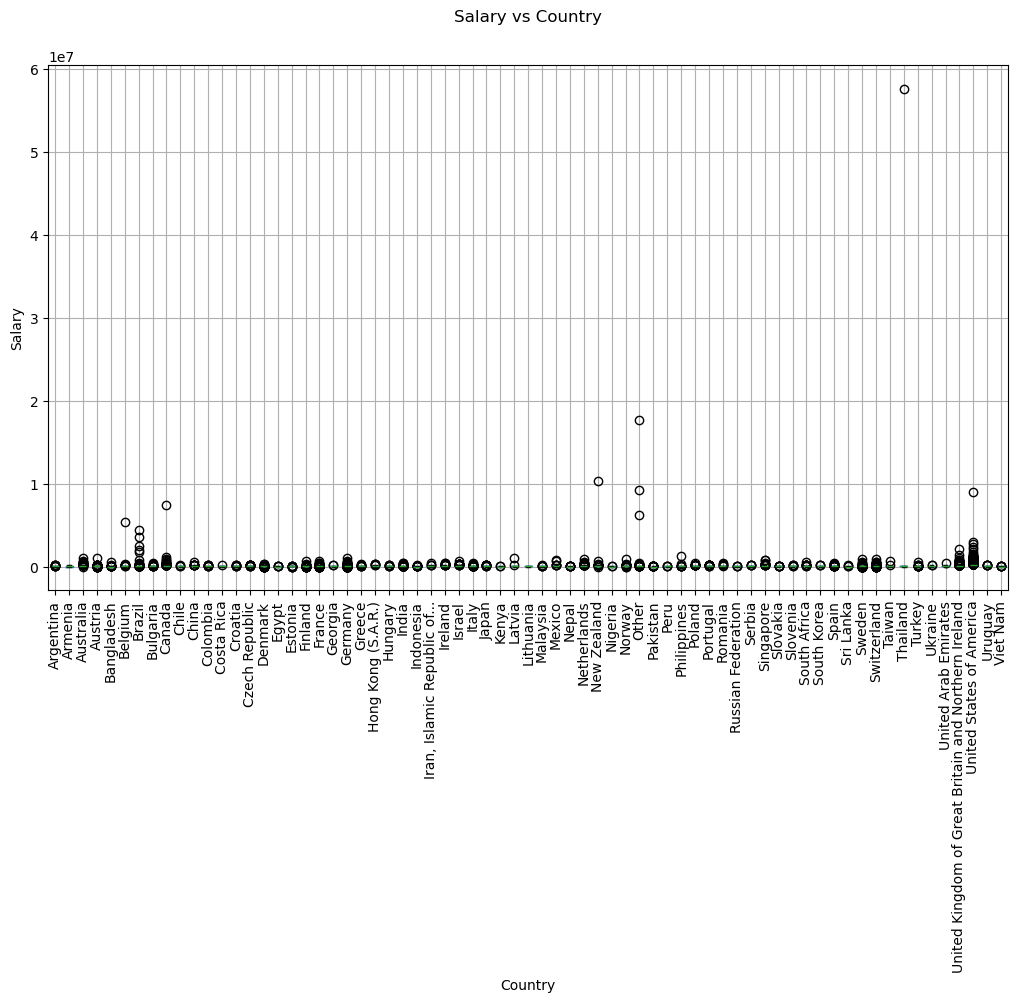

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
data.boxplot('Salary', 'Country', ax=ax);
plt.suptitle('Salary vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [15]:
data = data[data['Salary'] <= 240000]
data = data[data['Salary'] >= 12000]
data = data[data['Country'] != 'Other']

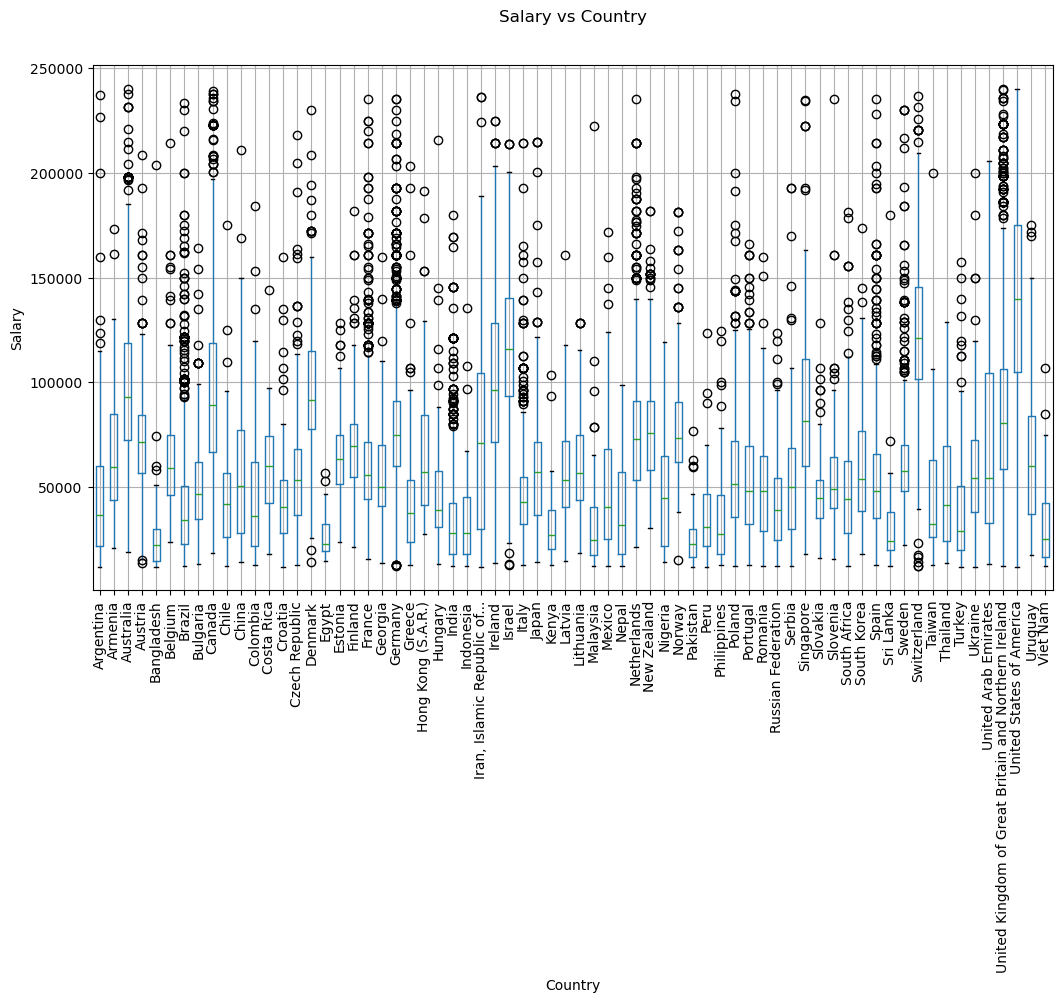

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
data.boxplot('Salary', 'Country', ax=ax);
plt.suptitle('Salary vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show();

In [17]:
data['YearsCodePro'].unique()

array(['7', '21', '3', '15', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '19', '13', '4', '16', '28', '11', '24', '25', '12',
       '20', '8', '18', '30', '27', '23', '17', '43', '38', '33', '29',
       '22', '1', '40', '34', '42', '26', '31', '36', '39', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [18]:
def polished_experience(years):
    if years == 'More than 50 years':
        return 50
    elif years == 'Less than 1 year':
        return 0.5
    else:
        return float(years)

data['YearsCodePro'] = data['YearsCodePro'].apply(polished_experience)

In [19]:
data['YearsCodePro'].unique()

array([ 7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,
       19. , 13. ,  4. , 16. , 28. , 11. , 24. , 25. , 12. , 20. ,  8. ,
       18. , 30. , 27. , 23. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [20]:
data.columns

Index(['Country', 'EdLevel', 'Age', 'YearsCodePro', 'Employment', 'Salary'], dtype='object')

In [21]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [22]:
def polish_education(x):
    if x == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":
        return "Bachelor’s degree"
    if x == "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":
        return "Master’s degree"
    if x == "Professional degree (JD, MD, Ph.D, Ed.D, etc.)":
        return "Post grad"
    if x == "Associate degree (A.A., A.S., etc.)":
        return "Associate degree"
    return "No Formal Education Beyond High School"

data['EdLevel'] = data['EdLevel'].apply(polish_education)

In [23]:
data['EdLevel'].value_counts()

EdLevel
Bachelor’s degree                         16172
Master’s degree                            9431
No Formal Education Beyond High School     5642
Post grad                                  1682
Associate degree                           1180
Name: count, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34107 entries, 3 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34107 non-null  object 
 1   EdLevel       34107 non-null  object 
 2   Age           34107 non-null  object 
 3   YearsCodePro  34107 non-null  float64
 4   Employment    34107 non-null  object 
 5   Salary        34107 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.8+ MB


In [25]:
data['Employment'].value_counts()

Employment
Employed, full-time    34107
Name: count, dtype: int64

In [26]:
data.drop('Employment', axis=1, inplace=True)

In [27]:
data.Age.value_counts()

Age
25-34 years old       16295
35-44 years old        9899
45-54 years old        3349
18-24 years old        3163
55-64 years old        1204
65 years or older       168
Prefer not to say        16
Under 18 years old       13
Name: count, dtype: int64

In [28]:
def organize_age(age):
    if age in ['Prefer not to say', 'Under 18 years old', '65 years or older']:
        return 'Others'
    return age

data['Age'] = data['Age'].apply(organize_age)

In [29]:
data.Age.unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '55-64 years old', '18-24 years old', 'Others'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

In [31]:
le_edlevel = LabelEncoder()
data['EdLevel'] = le_edlevel.fit_transform(data['EdLevel'])

In [32]:
le_age = LabelEncoder()
data['Age'] = le_age.fit_transform(data['Age'])

In [33]:
X = data.iloc[:, :-1]
y = data['Salary']

In [34]:
X

,Country,EdLevel,Age,YearsCodePro
3,65,1,1,7.0
5,64,3,2,21.0
6,65,3,2,3.0
7,65,1,1,3.0
8,18,2,3,15.0
...,...,...,...,...
89160,36,4,1,5.0
89162,6,2,2,24.0
89167,25,1,0,2.0
89170,19,2,1,9.0


In [35]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y.values)

LinearRegression()

In [36]:
prediction = lr_model.predict(X)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

error_lr = np.sqrt(mean_squared_error(y, prediction))
error_lr

44388.02270443083

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0, n_estimators=100)
rf_model.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [39]:
prediction = rf_model.predict(X)

In [40]:
error_rf = np.sqrt(mean_squared_error(y, prediction))
error_rf

28491.107088435714

In [41]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X, y.values)

DecisionTreeRegressor(random_state=42)

In [42]:
prediction = model.predict(X)

In [43]:
error = np.sqrt(mean_squared_error(y, prediction))
error

28125.801886214802

In [44]:
X

,Country,EdLevel,Age,YearsCodePro
3,65,1,1,7.0
5,64,3,2,21.0
6,65,3,2,3.0
7,65,1,1,3.0
8,18,2,3,15.0
...,...,...,...,...
89160,36,4,1,5.0
89162,6,2,2,24.0
89167,25,1,0,2.0
89170,19,2,1,9.0


In [45]:
X = np.array([['United States of America', 'Master’s degree', '25-34 years old', '15']])
X

array([['United States of America', 'Master’s degree', '25-34 years old',
        '15']], dtype='<U24')

In [46]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_edlevel.transform(X[:,1])
X[:,2] = le_age.transform(X[:,2])
X = X.astype(float)
X

array([[65.,  2.,  1., 15.]])

In [47]:
y_pred = model.predict(X)
y_pred

array([166000.])

In [48]:
import pickle

data = {"model" : model, "le_country" : le_country, "le_edlevel" : le_edlevel, "le_age" : le_age}
with open('saved_data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
with open('saved_data.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_model = data['model']
le_country = data['le_country']
le_edlevel = data['le_edlevel']
le_age = data['le_age']

In [50]:
y_pred = regressor_model.predict(X)
y_pred

array([166000.])